In [59]:
!pip install praw

In [60]:
import praw
import networkx as nx
import matplotlib.pyplot as plt
import pickle

In [61]:
user_agent = "web:CS579:v1.0 (by u/Relevant-Fig-773)"

reddit = praw.Reddit(
    client_id="qy6TBi9qSnML8nLApahmvg",
    client_secret="_TjZdio3jXn7Gpy6e2ABszjNIBX02w",
    user_agent=user_agent,
)

In [74]:
subreddit = reddit.subreddit("championsleague")

G = nx.Graph()

# Fetch data from top hot posts and their comments
for submission in subreddit.hot(limit=15):
    # Add the original post as the center node
    G.add_node(submission.author, title=submission.title, type="post")
    # Iterate through comments on the post
    for comment in submission.comments:
        # Check if the comment has a valid author
        if comment.author:
            # Add each commenting user as a node and connect them to the post
            G.add_node(comment.author, type="user")
            G.add_edge(submission.author, comment.author)



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

In [75]:
print(f"Size of network: {(len(G.nodes))} nodes")
print(f"Size of network: {(len(G.edges))} edges")

Size of network: 188 nodes
Size of network: 212 edges


In [87]:
## check all nodes are of same type so network is unimodal
for node in G.nodes:
  print(type(node))

<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.models.reddit.redditor.Redditor'>
<class 'praw.

In [77]:
#assert len(colors) == len(G.nodes)

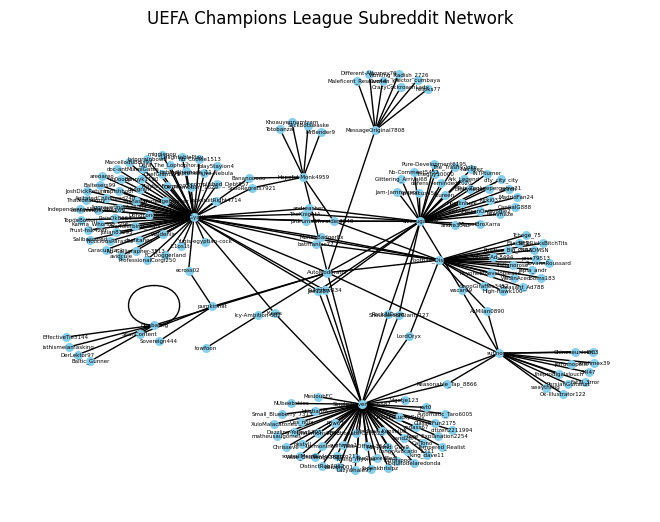

In [92]:
# Visualize the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_size=4, node_size=30, node_color='skyblue', font_color="black")
plt.title("UEFA Champions League Subreddit Network")
plt.show()

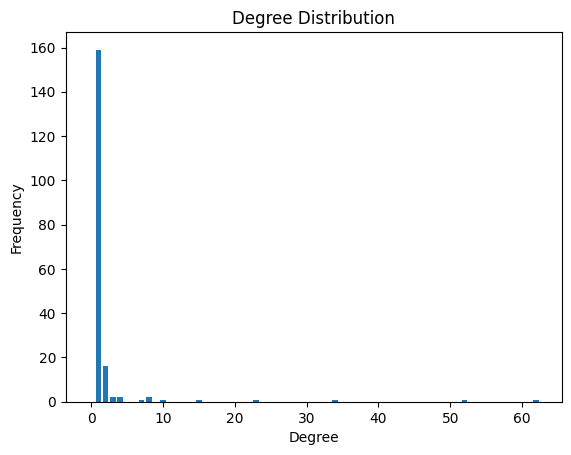

Degree Distribution: [0, 159, 16, 2, 2, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

Network Measures:
Average Clustering Coefficient: 0.017285066943529815
Pagerank:
  pumkinhat: 0.009053760414358817
  AutoModerator: 0.019858144153302462
  ecross02: 0.004564724214880143
  SeanContent: 0.0027214005871609836
  Sovereign444: 0.0027214005871609836
  Football_Discussions: 0.049256007939988446
  Whole-Ad-8494: 0.0026179659541260493
  MessageOriginal7808: 0.019667709549498553
  Felicks77: 0.002887113462391292
  hector_cumbaya: 0.002887113462391292
  Karman_K: 0.002887113462391292
  Working_Radish_2726: 0.002887113462391292
  Maleficent_Resolve44: 0.002887113462391292
  Different-Attorney76: 0.002887113462391292
  CrazyCockroachLady: 0.002887113462391292
  Single-Revenue-6587: 0.11600887485802802
  Automatic_Taro6005: 0.002693779984497811
  Pow67: 0.0026937799844978

In [91]:
# Calculate network measures
degree_distribution = nx.degree_histogram(G)

# Plot Degree Distribution
plt.bar(range(len(degree_distribution)), degree_distribution, align="center")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

# Print Degree Distribution (if needed)
print("Degree Distribution:", degree_distribution)

# Calculate other network measures
clustering_coefficient = nx.average_clustering(G)
pagerank = nx.pagerank(G)
diameter = nx.diameter(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Print other measures
print("\nNetwork Measures:")
print("Average Clustering Coefficient:", clustering_coefficient)
print("Pagerank:")
for node, value in pagerank.items():
    print(f"  {node}: {value}")
print("Diameter:", diameter)
print("Closeness Centrality:")
for node, value in closeness_centrality.items():
    print(f"  {node}: {value}")
print("Betweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"  {node}: {value}")